![](https://cdn.motor1.com/images/mgl/q9EVR/s1/most-expensive-cars.jpg)

## Problem Statement:
- A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

- They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car.



## Business Goal
- We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Understanding the data 

#### Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_style(style='darkgrid')


In [6]:
df=pd.read_csv('~/Desktop/Data sets ML/archive/CarPrice_Assignment.csv')


In [7]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### Understanding the datatframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.shape

(205, 26)

In [12]:
#decription of the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Cleaning the data
- we need to clean the data for feeding the model with correct data.

In [13]:
df['car_ID'].head()

0    1
1    2
2    3
3    4
4    5
Name: car_ID, dtype: int64

In [14]:
#checking the null values
df.isnull().sum()/df.index.size *100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

- From above there is no null values in the data.

In [15]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

car_ID : 205 labels
symboling : 6 labels
CarName : 147 labels
fueltype : 2 labels
aspiration : 2 labels
doornumber : 2 labels
carbody : 5 labels
drivewheel : 3 labels
enginelocation : 2 labels
wheelbase : 53 labels
carlength : 75 labels
carwidth : 44 labels
carheight : 49 labels
curbweight : 171 labels
enginetype : 7 labels
cylindernumber : 7 labels
enginesize : 44 labels
fuelsystem : 8 labels
boreratio : 38 labels
stroke : 37 labels
compressionratio : 32 labels
horsepower : 59 labels
peakrpm : 23 labels
citympg : 29 labels
highwaympg : 30 labels
price : 189 labels


In [16]:
#dropping the carID as it is not useful
df.drop(labels='car_ID',axis=1,inplace=True)

In [17]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

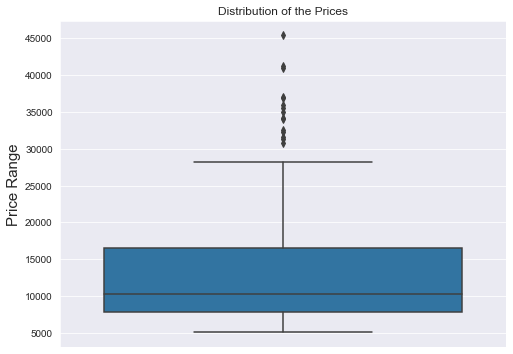

In [18]:
#Doing analysis on the target variable for finding the outliers
plt.figure(figsize=(8,6))
chart=sns.boxplot(y=df['price'],data=df)
chart.set_ylabel('Price Range',fontsize=15)
chart.set_title('Distribution of the Prices')
plt.show()

#### Insights:
 -  From above we find there are some outliers which is above 30000. but we will not remove them rather we use standard scaler to standarddize them

In [19]:
# Extarcting the car company from the car name
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [20]:
#Splitting the car name and taking the company only
def carname(x):
     return x.split(' ')[0]
df['CarName']=df['CarName'].apply(lambda x: carname(x))

In [21]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Typo Error in Car Company name

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [22]:
#Renaming the columns names which have typo error
df['CarName'].replace(to_replace={'maxda':'mazda','nissan':'Nissan','porcshce':'porsche',
                                  'toyouta':'toyota','vokswagen':'volkswagen','vw':' volkswagen',' volkswagen':'volkswagen'},inplace=True)

In [23]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', ' volkswagen', 'volvo'],
      dtype=object)

In [24]:
#Here Symboling is categorical so its in the int we will change to str
df['symboling'].dtype

dtype('int64')

In [25]:
df['symboling']=df['symboling'].astype(str)

In [26]:
df['symboling'].dtype

dtype('O')

In [27]:
#checking for duplicates
x=df[df.duplicated()]
x

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


 *There are no duplicate values in our dataframe*

## Step 3  Visualizing the data
- Here we will indentify if the IV columns has strong association with price column.

- Finding the cars which have sold most

In [28]:
df['CarName'].value_counts()

toyota         32
Nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen     10
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
 volkswagen     2
renault         2
mercury         1
Name: CarName, dtype: int64

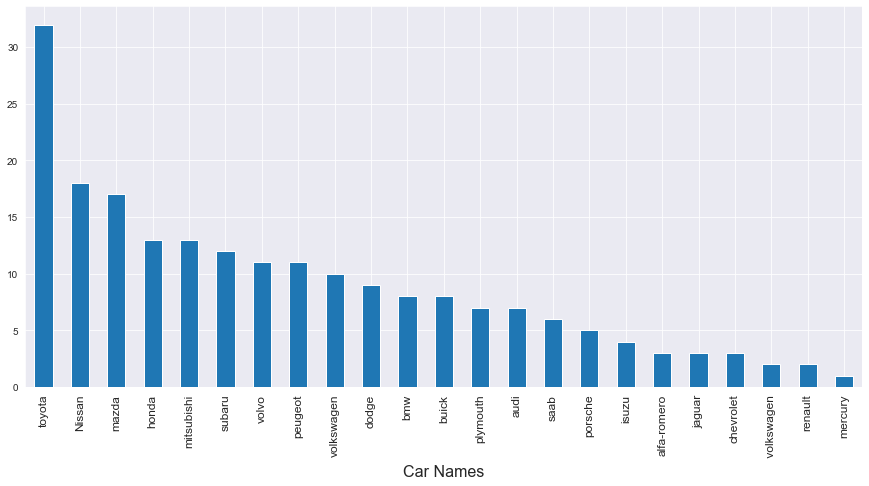

In [29]:
plt.figure(figsize=(15,7))
df['CarName'].value_counts().plot(kind='bar')
plt.xticks(fontsize=12)
plt.xlabel('Car Names',fontsize=16)
plt.show()

## Insights:
-  From above we can see Toyota has more number of sales followed by Nissan and mazda.
- and mercury seems to be very less compared to all.
------------------------------------------------------------------------------------------------

#### Visualizing the car prices

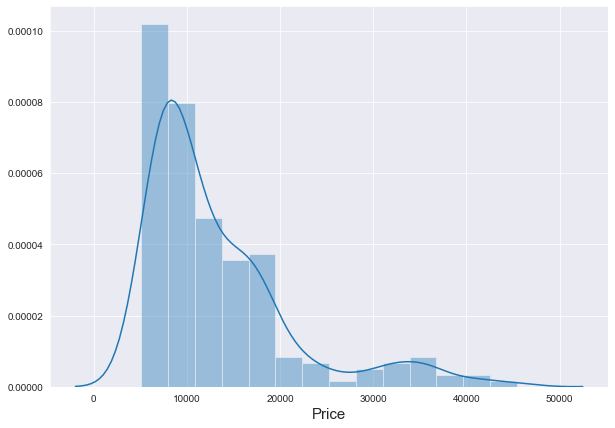

In [30]:
plt.figure(figsize=(10,7))
chart=sns.distplot(df['price'])
chart.set_xlabel('Price',fontsize=15)

plt.show()

### Insights:
- From above we can say that skewness is left skewed it means most of the data has been to the left side.
- most of the cars sold ranges from 10000 to 20000.
-------------------------------------------------------------------------------------------------------------------

## Visualizing the numerical variables
- Finding the correlation between the variables.


In [34]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [35]:
#making a variable for the numerical columns and categorical colummns
df_num=df.select_dtypes(exclude='object')
df_cat=df.select_dtypes(include='object')

In [36]:
df_num.keys()

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Visualizing with help of the pair plot

In [31]:
#sns.pairplot(data=df_num)

In [37]:
df_num.corr()[['price']]

,price
wheelbase,0.577816
carlength,0.682920
carwidth,0.759325
carheight,0.119336
curbweight,0.835305
enginesize,0.874145
boreratio,0.553173
stroke,0.079443
compressionratio,0.067984
horsepower,0.808139


## $Insights$:
- From above carlength,carwidth,curbweight,enginesize,horsepower has +ve correlation.
- and highwaympg,citympg has -ve correlation.
----------------------------------------------------------------------------------------

#### Visualizing some more categorical variables 
- finding strong association of the categorical variables wrt price

In [38]:
df_cat.keys()

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [39]:
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


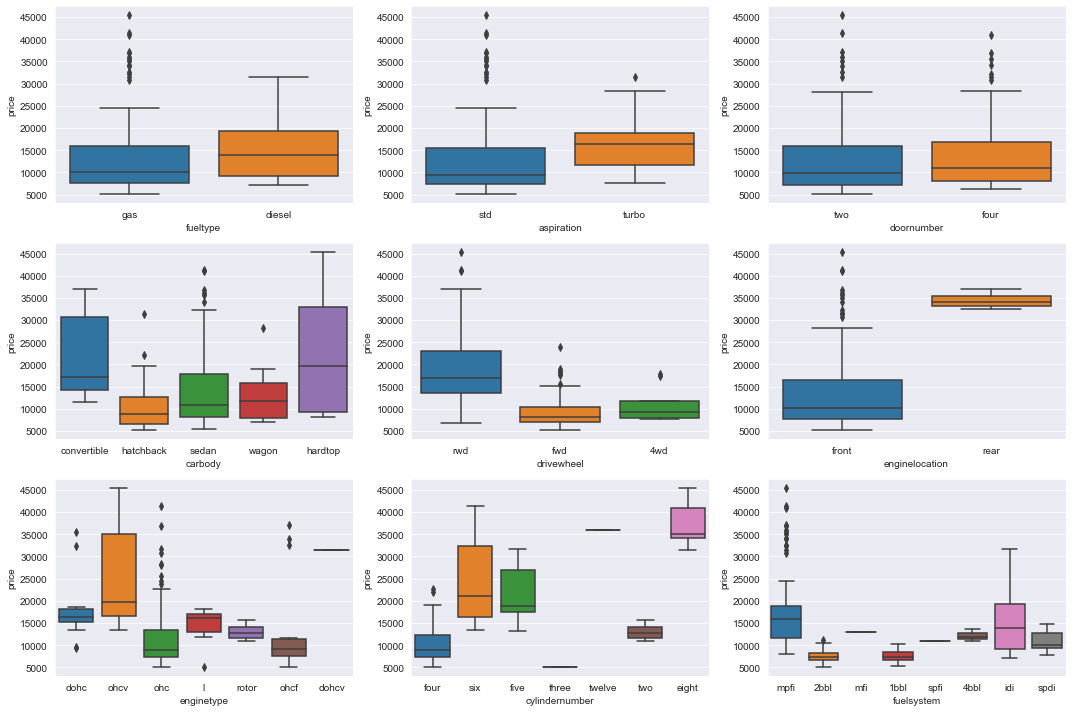

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype',y='price',data=df,)
plt.subplot(3,3 , 2)
sns.boxplot(x='aspiration',y='price',data=df)
plt.subplot(3, 3, 3)
sns.boxplot(x='doornumber',y='price',data=df)

plt.subplot(3, 3, 4)
sns.boxplot(x='carbody',y='price',data=df)
plt.subplot(3, 3, 5)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.subplot(3,3 ,6)
sns.boxplot(x='enginelocation',y='price',data=df)

plt.subplot(3, 3,7)
sns.boxplot(x='enginetype',y='price',data=df)
plt.subplot(3,3 ,8)
sns.boxplot(x='cylindernumber',y='price',data=df)
plt.subplot(3, 3,9)
sns.boxplot(x='fuelsystem',y='price',data=df)
plt.tight_layout()
plt.show()


### *Insights:*
- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
- DoorNumber isn't affecting the price much.
- All the types of carbody is relatively cheaper as compared to convertible carbody.
- HigherEnd cars seems to have rwd drivewheel.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- Enginetype ohcv comes into higher price range cars.
- The price of car is directly proportional to no. of cylinders in most cases.

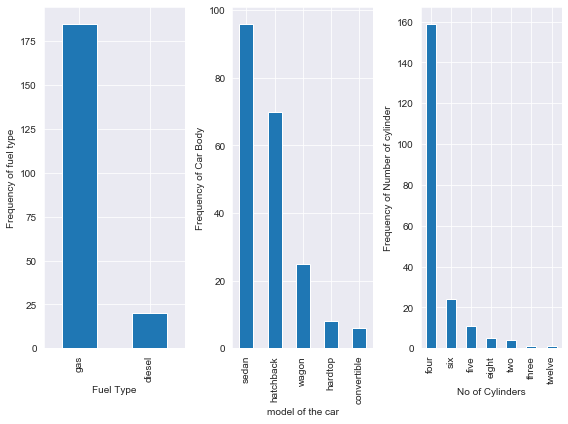

In [36]:
plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
df['fueltype'].value_counts().plot(kind='bar')
plt.xlabel('Fuel Type'),plt.ylabel('Frequency of fuel type')
plt.subplot(1,3,2)
df['carbody'].value_counts().plot(kind='bar')
plt.xlabel('model of the car'),plt.ylabel('Frequency of Car Body')
plt.subplot(1,3,3)
df['cylindernumber'].value_counts().plot(kind='bar')
plt.xlabel('No of Cylinders'),plt.ylabel('Frequency of Number of cylinder')
plt.tight_layout()
plt.show()

### *Insights:*
- The number of cylinders used in most cars is four.
- Number of Gas fueled cars are way more than diesel fueled cars.
- Sedan is the most prefered car type.

#### Relationship between fuelsystem vs price with hue fueltype


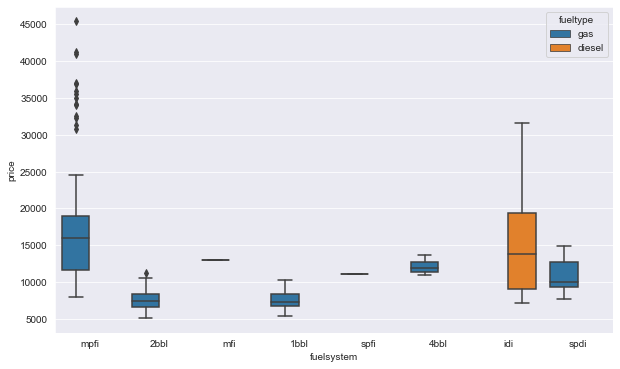

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuelsystem',y='price',data=df,hue='fueltype')
plt.show()

#### *Relationship between carbody and price *

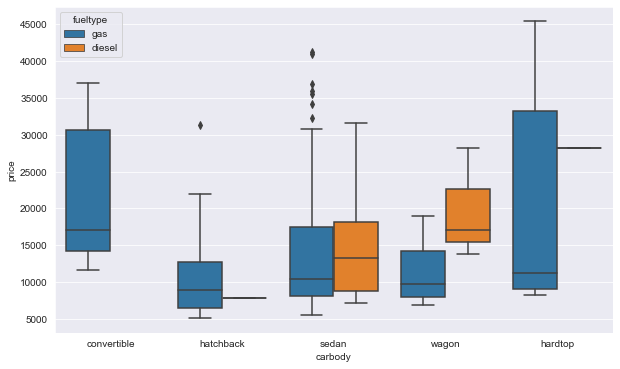

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='carbody',y='price',data=df,hue='fueltype')
plt.show()

- sedan model is the most sold car and with both the gas and diesel is same.
- hatchback is the second most sold car with only gas.

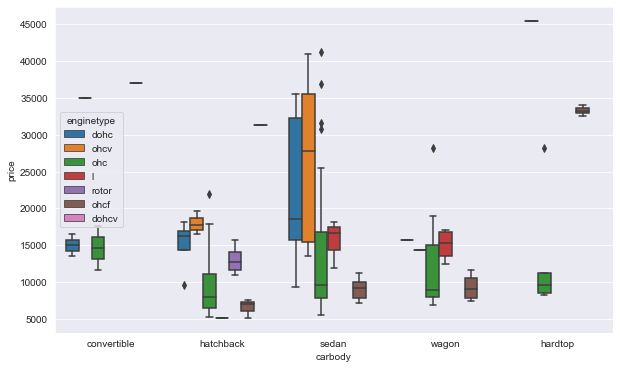

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='carbody',y='price',data=df,hue='enginetype')
plt.show()

- ohcv and dohc are the engine types mostly used in sedan.

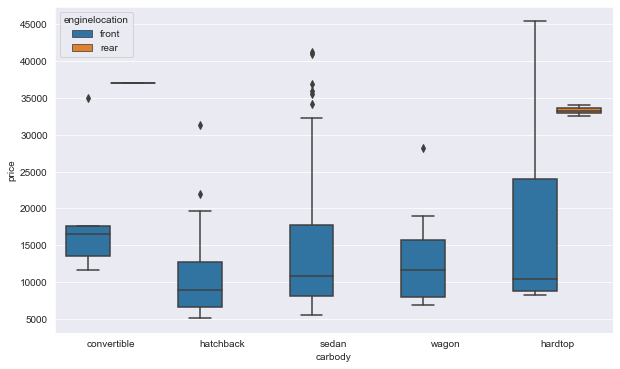

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='carbody',y='price',data=df,hue='enginelocation')
plt.show()

- All the cars have have front engine.

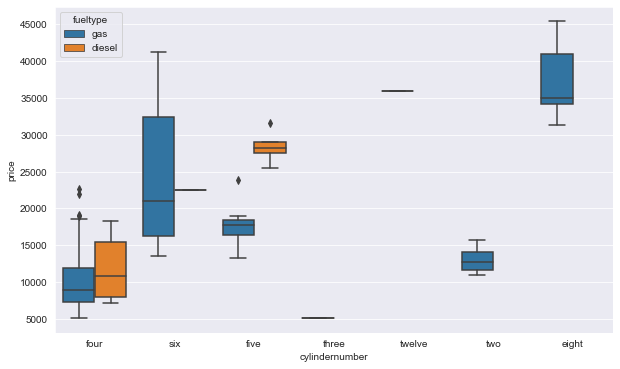

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cylindernumber',y='price',data=df,hue='fueltype')
plt.show()

- Four cylinder cars have been sold most in which diesel is mostly used.

### Finding the avg price of the cars

<Figure size 720x432 with 0 Axes>

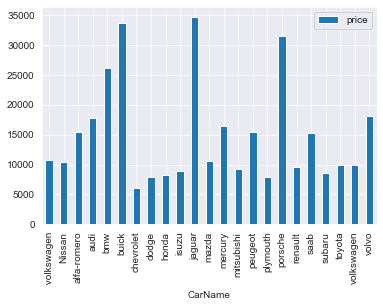

In [41]:
plt.figure(figsize=(10,6))
x=df.groupby(by=['CarName'])[['price']].mean()
x.plot(kind='bar')
plt.show()

- *Jaguar,Buick and porsche seems to have the highest average price.*

In [42]:
#assigning another variable
Cars_category=[]
for i in df['price']:
    if i <10000:
        x='Budget_friendly'
        Cars_category.append(x)
    elif i < 20000:
        y='Medium_range'
        Cars_category.append(y)
    else:
        z='Top_notch_cars'
        Cars_category.append(z)

In [43]:
df['Cars_category']=Cars_category

In [44]:
import matplotlib.pyplot as plt

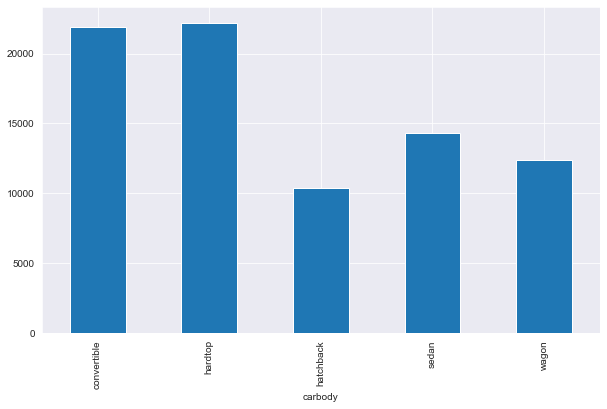

In [45]:
plt.figure(figsize=(10,6))
x=df.groupby(['carbody'])['price'].mean()
x.plot(kind='bar')
plt.show()

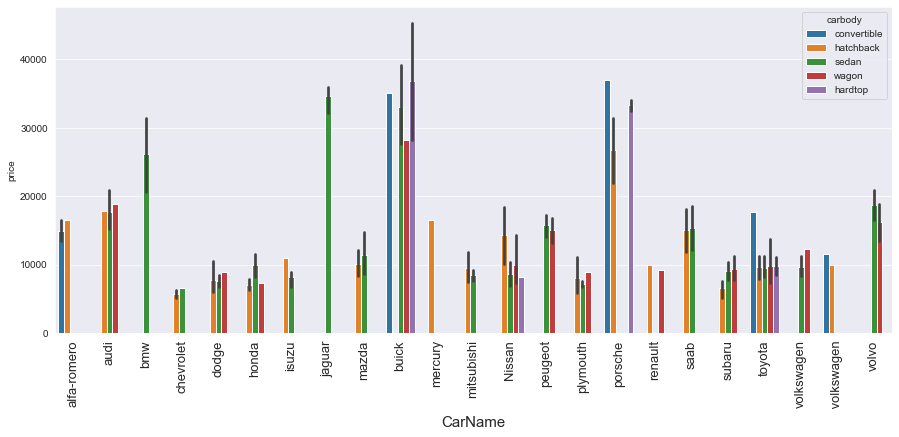

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(x='CarName',y='price',data=df,hue='carbody')
plt.xlabel(xlabel='CarName',fontsize=15)
plt.xticks(rotation=90,fontsize=13)
plt.show()

In [47]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium_range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium_range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium_range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Medium_range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium_range


## *Significant variables after Visualization*

 - 'price','Cars_category','enginetype','fueltype','aspiration',
         'carlength','carwidth','curbweight','enginesize',
         'enginelocation','horsepower','highwaympg','citympg','carbody',
           'cylindernumber','drivewheel','wheelbase'

## Step 4 Data Preparation

In [48]:
sig_col=['price','Cars_category','enginetype','fueltype','aspiration',
         'carlength','carwidth','curbweight','enginesize',
         'boreratio','horsepower','highwaympg','citympg','carbody',
           'cylindernumber','drivewheel','wheelbase']

In [49]:
df=df[sig_col] 
df.head(5)

,price,Cars_category,enginetype,fueltype,aspiration,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,carbody,cylindernumber,drivewheel,wheelbase
0,13495.0,Medium_range,dohc,gas,std,168.8,64.1,2548,130,3.47,111,27,21,convertible,four,rwd,88.6
1,16500.0,Medium_range,dohc,gas,std,168.8,64.1,2548,130,3.47,111,27,21,convertible,four,rwd,88.6
2,16500.0,Medium_range,ohcv,gas,std,171.2,65.5,2823,152,2.68,154,26,19,hatchback,six,rwd,94.5
3,13950.0,Medium_range,ohc,gas,std,176.6,66.2,2337,109,3.19,102,30,24,sedan,four,fwd,99.8
4,17450.0,Medium_range,ohc,gas,std,176.6,66.4,2824,136,3.19,115,22,18,sedan,five,4wd,99.4


In [50]:
df.shape

(205, 17)

In [51]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,Cars_category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel
0,Medium_range,dohc,gas,std,convertible,four,rwd
1,Medium_range,dohc,gas,std,convertible,four,rwd
2,Medium_range,ohcv,gas,std,hatchback,six,rwd
3,Medium_range,ohc,gas,std,sedan,four,fwd
4,Medium_range,ohc,gas,std,sedan,five,4wd


#### *With help of one Hot coding creating dummy variables*

In [52]:

dummies=pd.get_dummies(data=df_cat,columns=['Cars_category','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel'])
dummies.shape

(205, 29)

In [53]:
#After applying dropfirst
dummies=pd.get_dummies(data=df_cat,columns=['Cars_category','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel'],drop_first=True)
dummies.shape

(205, 22)

In [54]:
#concating the dummies and df
df=pd.concat([df,dummies],axis=1)
df.shape

(205, 39)

In [55]:
#Dropping the categorical  variable
df=df.select_dtypes(exclude='object')
df.shape

(205, 32)

In [56]:
df.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase,Cars_category_Medium_range,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,13495.0,168.8,64.1,2548,130,3.47,111,27,21,88.6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,16500.0,168.8,64.1,2548,130,3.47,111,27,21,88.6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,16500.0,171.2,65.5,2823,152,2.68,154,26,19,94.5,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,13950.0,176.6,66.2,2337,109,3.19,102,30,24,99.8,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,17450.0,176.6,66.4,2824,136,3.19,115,22,18,99.4,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0


## Step 5 Splitting the data into train and test splits
- As we know the  first step of the regression is performing a train-test split.

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
## We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [60]:
df_train.shape,df_test.shape


((143, 32), (62, 32))

In [61]:
df_train.head(5)

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase,Cars_category_Medium_range,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,7609.0,167.3,63.8,2191,98,2.97,68,38,31,93.7,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
125,22018.0,168.9,68.3,2778,151,3.94,143,27,19,94.5,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
166,9538.0,168.7,64.0,2300,98,3.24,112,29,26,94.5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,16500.0,168.8,64.1,2548,130,3.47,111,27,21,88.6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
199,18950.0,188.8,67.2,3157,130,3.62,162,22,17,104.3,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1


### Rescaling the Features
- For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:
    - Min-Max scaling
    - Standardisation (mean-0, std-1)


In [62]:
from sklearn import preprocessing

In [63]:
scaler=preprocessing.StandardScaler()

In [64]:
##Applying Standard scaler to all the numerical columns except the dummy variables
sig_col_num=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio',
             'horsepower','citympg','highwaympg','price']

In [65]:
df_train[sig_col_num]=scaler.fit_transform(df_train[sig_col_num])
df_train[sig_col_num]

C:\Users\TArun KUmar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\TArun KUmar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
122,-0.811836,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,-0.700201
125,-0.677177,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,1.151929
166,-0.677177,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,-0.452248
1,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,0.442646
199,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,0.757569
...,...,...,...,...,...,...,...,...,...,...
87,-0.374195,-0.080993,-0.199352,-0.251520,-0.366345,-0.528342,0.339725,-0.358108,-0.125787,-0.485539
103,0.315930,0.890809,0.299187,0.958998,1.372551,0.471340,1.249192,-0.957048,-0.845291,0.056898
67,1.931832,1.392642,2.021412,1.797333,1.421534,1.048080,0.516566,-0.507843,-0.845291,1.606189
24,-0.811836,-1.283797,-0.924500,-1.054847,-0.856174,-1.297329,-0.872898,0.839773,1.025419,-0.877586


In [66]:
df_train[sig_col_num]

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
122,-0.811836,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,-0.700201
125,-0.677177,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,1.151929
166,-0.677177,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,-0.452248
1,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,0.442646
199,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,0.757569
...,...,...,...,...,...,...,...,...,...,...
87,-0.374195,-0.080993,-0.199352,-0.251520,-0.366345,-0.528342,0.339725,-0.358108,-0.125787,-0.485539
103,0.315930,0.890809,0.299187,0.958998,1.372551,0.471340,1.249192,-0.957048,-0.845291,0.056898
67,1.931832,1.392642,2.021412,1.797333,1.421534,1.048080,0.516566,-0.507843,-0.845291,1.606189
24,-0.811836,-1.283797,-0.924500,-1.054847,-0.856174,-1.297329,-0.872898,0.839773,1.025419,-0.877586


In [67]:
df_train.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase,Cars_category_Medium_range,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,-0.700201,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,1.025419,0.839773,-0.811836,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
125,1.151929,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.557490,-0.957048,-0.677177,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
166,-0.452248,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,-0.269688,0.091098,-0.677177,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.442646,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.557490,-0.657578,-1.670284,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
199,0.757569,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.276993,-1.256518,0.972390,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1


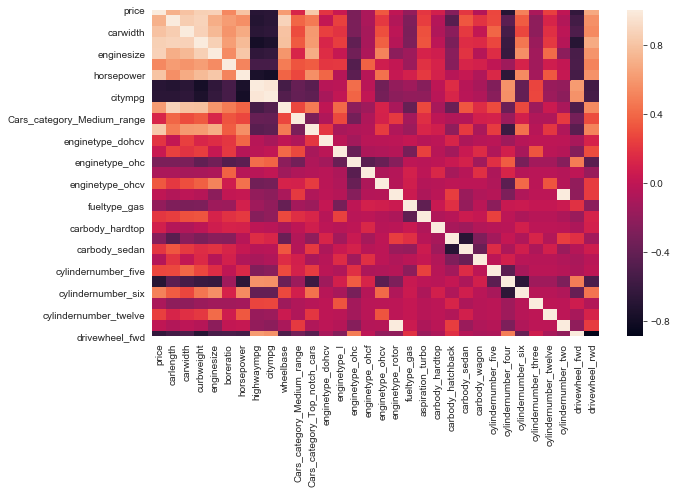

In [68]:
## Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (10, 6))
sns.heatmap(df_train.corr())
plt.show()

In [69]:
df_train.corr()[['price']]

,price
price,1.000000
carlength,0.713749
carwidth,0.799380
curbweight,0.861860
enginesize,0.867915
boreratio,0.533591
horsepower,0.806183
highwaympg,-0.688389
citympg,-0.674290
wheelbase,0.622591


- Let's see scatterplot for few correlated variables vs price.

In [70]:
col=['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth','carlength']

In [71]:
 for a,b in enumerate(col):
        print(b)

highwaympg
citympg
horsepower
enginesize
curbweight
carwidth
carlength


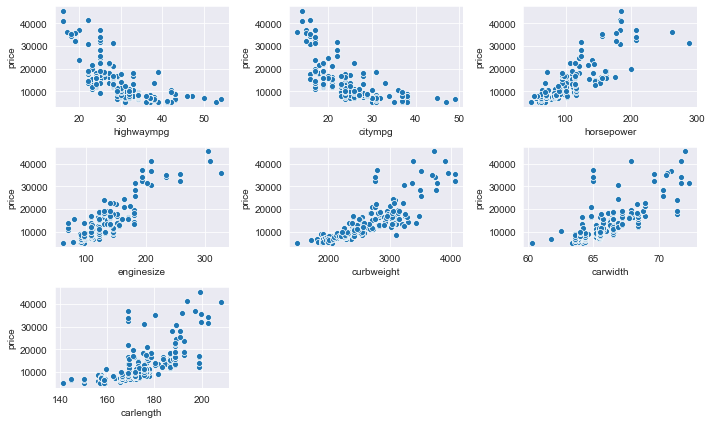

In [72]:
plt.figure(figsize=(10,6))
for a,b in enumerate(col):
    plt.subplot(3,3,a+1)
    sns.scatterplot(x=b,y='price',data=df)
    plt.xlabel(xlabel=b)
    
plt.tight_layout()


- from above we can fit a line.

# Step 6  Building a linear model
------------------------------------------

## *Dividing the X and Y sets for model building*

In [73]:
#Declaring a variable for all IV and DV
X=df_train
y=df_train.pop('price')


In [74]:
X

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase,Cars_category_Medium_range,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,1.025419,0.839773,-0.811836,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
125,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.557490,-0.957048,-0.677177,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
166,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,-0.269688,0.091098,-0.677177,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.557490,-0.657578,-1.670284,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
199,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.276993,-1.256518,0.972390,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.080993,-0.199352,-0.251520,-0.366345,-0.528342,0.339725,-0.125787,-0.358108,-0.374195,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
103,0.890809,0.299187,0.958998,1.372551,0.471340,1.249192,-0.845291,-0.957048,0.315930,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
67,1.392642,2.021412,1.797333,1.421534,1.048080,0.516566,-0.845291,-0.507843,1.931832,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
24,-1.283797,-0.924500,-1.054847,-0.856174,-1.297329,-0.872898,1.025419,0.839773,-0.811836,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [75]:
y

122   -0.700201
125    1.151929
166   -0.452248
1      0.442646
199    0.757569
         ...   
87    -0.485539
103    0.056898
67     1.606189
24    -0.877586
8      1.390627
Name: price, Length: 143, dtype: float64

In [76]:
# We have X,y so we will train the model
import statsmodels.api as sm

In [77]:
X1=sm.add_constant(X)
X1.head()

C:\Users\TArun KUmar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase,Cars_category_Medium_range,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,1.0,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,1.025419,0.839773,-0.811836,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
125,1.0,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.557490,-0.957048,-0.677177,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
166,1.0,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,-0.269688,0.091098,-0.677177,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,1.0,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.557490,-0.657578,-1.670284,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
199,1.0,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.276993,-1.256518,0.972390,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1


In [78]:
model1=sm.OLS(y,X1).fit()

In [79]:
model1

In [80]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     77.95
Date:                Thu, 21 May 2020   Prob (F-statistic):           9.24e-62
Time:                        09:46:03   Log-Likelihood:                 17.706
No. Observations:                 143   AIC:                             26.59
Df Residuals:                     112   BIC:                             118.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [81]:
model1.params

const                           0.886036
carlength                       0.077586
carwidth                       -0.021161
curbweight                      0.155519
enginesize                      0.127974
boreratio                      -0.131979
horsepower                      0.685592
highwaympg                      0.160809
citympg                        -0.034955
wheelbase                       0.068124
Cars_category_Medium_range      0.103467
Cars_category_Top_notch_cars    1.258798
enginetype_dohcv               -2.068396
enginetype_l                    0.365639
enginetype_ohc                  0.319975
enginetype_ohcf                 0.457260
enginetype_ohcv                -0.078697
enginetype_rotor                0.158526
fueltype_gas                   -0.369238
aspiration_turbo               -0.306545
carbody_hardtop                -0.566682
carbody_hatchback              -0.560489
carbody_sedan                  -0.487557
carbody_wagon                  -0.544114
cylindernumber_f

In [82]:
X2=X['horsepower']
X2.head()   #-0.44

122   -0.872898
125    1.021826
166    0.238673
1      0.213410
199    1.501822
Name: horsepower, dtype: float64

In [83]:
X2c=sm.add_constant(X2)
X2c.head()

,const,horsepower
122,1.0,-0.872898
125,1.0,1.021826
166,1.0,0.238673
1,1.0,0.213410
199,1.0,1.501822


In [84]:
model2=sm.OLS(y,X2c).fit()

In [85]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.04e-34
Time:                        09:46:03   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e-16      0.050   3.06e-15      1.0

### 
- *From above the R2 score value is 0.650 ,so we add another variable to train.*

In [86]:
model2.params

const         1.526557e-16
horsepower    8.061830e-01
dtype: float64

In [87]:
X2c.iloc[:,1]

122   -0.872898
125    1.021826
166    0.238673
1      0.213410
199    1.501822
         ...   
87     0.339725
103    1.249192
67     0.516566
24    -0.872898
8      0.946037
Name: horsepower, Length: 143, dtype: float64

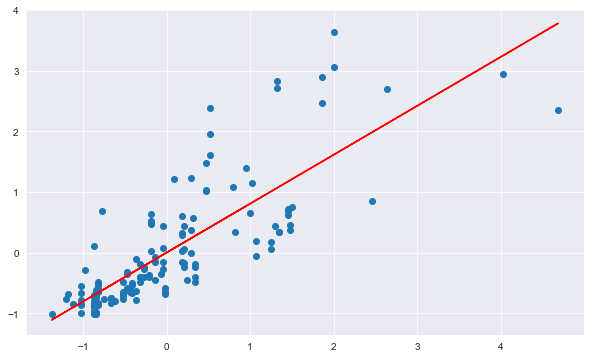

In [88]:
#Drawing a  best fitting line here  for horse power

plt.figure(figsize=(10,6))
plt.scatter(X2c.iloc[:,1],y)
plt.plot(X2c.iloc[:,1],model2.params[1]*X2c.iloc[:,1],'r')
plt.show()

In [89]:
col

['highwaympg',
 'citympg',
 'horsepower',
 'enginesize',
 'curbweight',
 'carwidth',
 'carlength']

In [90]:
X3=X[['horsepower','enginesize']]

In [91]:
X3c=sm.add_constant(X3)

In [92]:
model3=sm.OLS(y,X3c).fit()

In [93]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.17e-47
Time:                        09:46:05   Log-Likelihood:                -94.227
No. Observations:                 143   AIC:                             194.5
Df Residuals:                     140   BIC:                             203.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e-16      0.040   3.86e-15      1.0

In [94]:
X4=X[['horsepower','enginesize','curbweight']]

In [95]:
X4c=sm.add_constant(X4)

In [96]:
model4=sm.OLS(y,X4c).fit()

In [97]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.16e-51
Time:                        09:46:06   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.492e-16      0.036   4.13e-15      1.0

#### Since we have achieved good r2score of 0.819 with help of highly correlated variables.

- Now lets use RFE to select the independent variables which accurately predicts the dependent variable price.

## RFE
- Let's use Recursive feature elimination since we have too many independent variables.

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [99]:
lr=LinearRegression() 


In [100]:
# Running RFE with the output number of the variable equal to 15
model=lr.fit(X,y)
rfe=RFE(model,15) # 


In [101]:
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [102]:
rfe=rfe.fit(X,y)

In [103]:
list(zip(X.columns,rfe.support_,rfe.ranking_)) #31

[('carlength', False, 8),
 ('carwidth', False, 17),
 ('curbweight', False, 3),
 ('enginesize', False, 10),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('highwaympg', False, 7),
 ('citympg', False, 15),
 ('wheelbase', False, 14),
 ('Cars_category_Medium_range', False, 11),
 ('Cars_category_Top_notch_cars', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 12),
 ('enginetype_rotor', False, 4),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 16),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 6),
 ('drivewheel_fwd', False, 9),
 ('drivewheel_rwd', False, 13)]

In [104]:
#selecting the variables which are in support
col_sup=X.columns[rfe.support_]
col_sup

Index(['horsepower', 'Cars_category_Top_notch_cars', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [105]:
X[col_sup].head()

,horsepower,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve
122,-0.872898,0,0,0,1,1,0,0,0,1,0,0,1,0,0
125,1.021826,1,0,0,1,1,0,0,1,0,0,0,1,0,0
166,0.238673,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,0.213410,0,0,0,0,1,0,0,0,0,0,0,1,0,0
199,1.501822,0,0,0,1,1,1,0,0,0,1,0,1,0,0


- After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable.

In [106]:
X_train_rfe=X[col_sup]

In [107]:
X_train_rfe.head()

,horsepower,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve
122,-0.872898,0,0,0,1,1,0,0,0,1,0,0,1,0,0
125,1.021826,1,0,0,1,1,0,0,1,0,0,0,1,0,0
166,0.238673,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,0.213410,0,0,0,0,1,0,0,0,0,0,0,1,0,0
199,1.501822,0,0,0,1,1,1,0,0,0,1,0,1,0,0


In [108]:
X.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase,Cars_category_Medium_range,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,1.025419,0.839773,-0.811836,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
125,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.557490,-0.957048,-0.677177,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
166,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,-0.269688,0.091098,-0.677177,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.557490,-0.657578,-1.670284,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
199,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.276993,-1.256518,0.972390,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1


## We need to check both Pvalue and VIF value .

In [109]:
# Adding a constant variable and Build a first fitted model
X_train_rfeC=sm.add_constant(X_train_rfe)
lm=sm.OLS(y,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              107.7
Date:                Thu, 21 May 2020   Prob (F-statistic):                    6.74e-65
Time:                        09:46:08   Log-Likelihood:                         -16.184
No. Observations:                 143   AIC:                                      62.37
Df Residuals:                     128   BIC:                                      106.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

C:\Users\TArun KUmar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)
  and we need to drop it.

## Checking VIF
- Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

$VIF= \frac {1}{1−R^2} $

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
12,cylindernumber_four,18.39
5,fueltype_gas,14.21
9,carbody_sedan,12.92
8,carbody_hatchback,9.03
4,enginetype_ohc,7.10
0,horsepower,5.27
13,cylindernumber_six,4.47
10,carbody_wagon,4.44
11,cylindernumber_five,2.75
6,aspiration_turbo,2.47


#### *We generally want a VIF that is less than 5. So there are clearly some variables we need to drop*

- Dropping the variable and updating the model
- Dropping carbody_hardtop  beacuse its p-value is 0.9 and we want p-value less than 0.05 and hence rebuilding the model

In [138]:
X_train_rfe1=X_train_rfe.drop('carbody_hardtop',1)
X_train_rfe1c=sm.add_constant(X_train_rfe1)
lm1=sm.OLS(y,X_train_rfe1).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              116.3
Date:                Thu, 21 May 2020   Prob (F-statistic):                    6.13e-66
Time:                        10:18:45   Log-Likelihood:                         -16.185
No. Observations:                 143   AIC:                                      60.37
Df Residuals:                     129   BIC:                                      101.8
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

C:\Users\TArun KUmar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [139]:
vif=pd.DataFrame()
vif['features']=X_train_rfe1.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
11,cylindernumber_four,16.59
5,fueltype_gas,13.33
8,carbody_sedan,9.19
4,enginetype_ohc,7.04
7,carbody_hatchback,6.65
0,horsepower,5.27
12,cylindernumber_six,4.05
9,carbody_wagon,3.41
10,cylindernumber_five,2.59
6,aspiration_turbo,2.47


- Dropping carbody_hatchback which its pvalue is 0.4

In [141]:
X_train_rfe2=X_train_rfe1.drop('carbody_hatchback',1)
X_train_rfe2c=sm.add_constant(X_train_rfe2)
lm2=sm.OLS(y,X_train_rfe2c).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     146.7
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.46e-70
Time:                        10:19:29   Log-Likelihood:                -5.6241
No. Observations:                 143   AIC:                             39.25
Df Residuals:                     129   BIC:                             80.73
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [120]:
vif=pd.DataFrame()
vif['features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
10,cylindernumber_four,15.77
5,fueltype_gas,9.32
4,enginetype_ohc,6.96
0,horsepower,4.79
11,cylindernumber_six,3.24
7,carbody_sedan,2.63
9,cylindernumber_five,2.39
1,Cars_category_Top_notch_cars,2.20
6,aspiration_turbo,2.20
2,enginetype_dohcv,1.64


- cylindernumber_five has going to drop

In [142]:
X_train_rfe3=X_train_rfe2.drop('cylindernumber_five',1)
X_train_rfe3c=sm.add_constant(X_train_rfe3)
lm3=sm.OLS(y,X_train_rfe3c).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     158.2
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.41e-71
Time:                        10:19:51   Log-Likelihood:                -6.4631
No. Observations:                 143   AIC:                             38.93
Df Residuals:                     130   BIC:                             77.44
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [124]:
vif=pd.DataFrame()
vif['features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
9,cylindernumber_four,9.50
5,fueltype_gas,8.00
4,enginetype_ohc,5.49
0,horsepower,4.78
10,cylindernumber_six,2.48
7,carbody_sedan,2.38
1,Cars_category_Top_notch_cars,2.20
6,aspiration_turbo,2.01
2,enginetype_dohcv,1.62
3,enginetype_l,1.51


In [143]:
X_train_rfe4=X_train_rfe3.drop('enginetype_ohc',1)
X_train_rfe4c=sm.add_constant(X_train_rfe4)
lm4=sm.OLS(y,X_train_rfe4c).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     171.3
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.48e-72
Time:                        10:20:12   Log-Likelihood:                -7.4741
No. Observations:                 143   AIC:                             38.95
Df Residuals:                     131   BIC:                             74.50
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [128]:
vif=pd.DataFrame()
vif['features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
8,cylindernumber_four,8.89
4,fueltype_gas,7.20
0,horsepower,4.16
9,cylindernumber_six,2.48
6,carbody_sedan,2.33
1,Cars_category_Top_notch_cars,1.98
5,aspiration_turbo,1.86
2,enginetype_dohcv,1.60
10,cylindernumber_twelve,1.48
7,carbody_wagon,1.39


In [144]:
X_train_rfe5=X_train_rfe4.drop('cylindernumber_four',1)
X_train_rfe5c=sm.add_constant(X_train_rfe5)
lm5=sm.OLS(y,X_train_rfe5c).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     187.0
Date:                Thu, 21 May 2020   Prob (F-statistic):           8.03e-73
Time:                        10:20:23   Log-Likelihood:                -8.4874
No. Observations:                 143   AIC:                             38.97
Df Residuals:                     132   BIC:                             71.57
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [131]:
vif=pd.DataFrame()
vif['features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,horsepower,2.99
8,cylindernumber_six,2.39
6,carbody_sedan,2.25
4,fueltype_gas,2.24
1,Cars_category_Top_notch_cars,1.92
5,aspiration_turbo,1.53
2,enginetype_dohcv,1.52
9,cylindernumber_twelve,1.44
7,carbody_wagon,1.36
3,enginetype_l,1.22


In [145]:
X_train_rfe6=X_train_rfe5.drop('carbody_wagon',1)
X_train_rfe6c=sm.add_constant(X_train_rfe6)
lm6=sm.OLS(y,X_train_rfe6c).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     203.7
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.98e-73
Time:                        10:20:45   Log-Likelihood:                -10.335
No. Observations:                 143   AIC:                             40.67
Df Residuals:                     133   BIC:                             70.30
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [133]:
vif=pd.DataFrame()
vif['features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,horsepower,2.92
7,cylindernumber_six,2.36
6,carbody_sedan,1.96
4,fueltype_gas,1.93
1,Cars_category_Top_notch_cars,1.92
2,enginetype_dohcv,1.52
5,aspiration_turbo,1.51
8,cylindernumber_twelve,1.43
3,enginetype_l,1.17


- Lets drop fueltype_gas and see if there is any drastic fall in R squared.If not we can drop carbody sedan. Our aim is to explain the maximum variance with minimum variable.

In [146]:
X_train_rfe7=X_train_rfe6.drop('fueltype_gas',1)
X_train_rfe7c=sm.add_constant(X_train_rfe7)
lm7=sm.OLS(y,X_train_rfe7c).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     156.0
Date:                Thu, 21 May 2020   Prob (F-statistic):           5.12e-64
Time:                        10:20:59   Log-Likelihood:                -36.067
No. Observations:                 143   AIC:                             90.13
Df Residuals:                     134   BIC:                             116.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [135]:
vif=pd.DataFrame()
vif['features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,horsepower,2.68
6,cylindernumber_six,2.06
1,Cars_category_Top_notch_cars,1.91
5,carbody_sedan,1.61
4,aspiration_turbo,1.43
2,enginetype_dohcv,1.42
7,cylindernumber_twelve,1.39
3,enginetype_l,1.17


In [147]:
X_train_rfe8=X_train_rfe7.drop('carbody_sedan',1)
X_train_rfe8c=sm.add_constant(X_train_rfe8)
lm8=sm.OLS(y,X_train_rfe8c).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.80e-64
Time:                        10:21:11   Log-Likelihood:                -38.798
No. Observations:                 143   AIC:                             93.60
Df Residuals:                     135   BIC:                             117.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [137]:
vif=pd.DataFrame()
vif['features']=X_train_rfe8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,horsepower,2.26
5,cylindernumber_six,1.84
1,Cars_category_Top_notch_cars,1.74
2,enginetype_dohcv,1.39
6,cylindernumber_twelve,1.31
4,aspiration_turbo,1.30
3,enginetype_l,1.15


     - Here X_train_rfe8 and X_train_rfe6 both the R2 square values in the acceptable range.

- So  we go ahead and make our predictions with both 0f these


# Model 1

#### Step 7: Residual Analysis of the train data
- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [149]:
Y_train_price=lm8.predict(X_train_rfe8c)

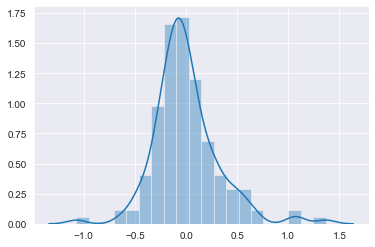

In [150]:
sns.distplot((y-Y_train_price),bins=20)

# Step 8: Making Predictions Using the Final Model
- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [151]:
sig_col_num=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio',
             'horsepower','citympg','highwaympg','price']

In [159]:
df_test[sig_col_num]=scaler.fit_transform(df_test[sig_col_num])
df_test.shape

C:\Users\TArun KUmar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\TArun KUmar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(62, 32)

In [160]:
df_test[sig_col_num].head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
160,-0.587157,-0.794680,-0.845273,-1.086333,-0.780488,-0.669882,-0.969994,2.145392,2.477197,-0.722601
186,-0.325847,-0.328646,-0.286672,-0.691974,-0.523466,-0.669882,-0.584319,0.354502,0.529274,-0.632141
59,-0.080869,0.197800,0.221147,-0.452308,-0.219712,0.030501,-0.610031,0.191694,0.229594,-0.590316
165,-0.783139,-0.587554,-1.048400,-0.713761,-0.780488,-0.494786,0.109897,0.191694,-0.219927,-0.536184
140,-0.979122,-1.571403,-1.149964,-0.768231,-0.546831,0.835940,-0.892859,0.191694,0.079754,-0.738733


In [162]:
#Dividing the test into x test and y test
x_test=df_test
y_test=df_test.pop('price')


In [167]:
X_test1=sm.add_constant(x_test)
X_test_new=X_test1[X_train_rfe8c.columns]

In [163]:
#X_train_rfe8c.columns

Index(['const', 'horsepower', 'Cars_category_Top_notch_cars',
       'enginetype_dohcv', 'enginetype_l', 'aspiration_turbo',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [168]:
#X_test_new

,const,horsepower,Cars_category_Top_notch_cars,enginetype_dohcv,enginetype_l,aspiration_turbo,cylindernumber_six,cylindernumber_twelve
160,1.0,-0.969994,0,0,0,0,0,0
186,1.0,-0.584319,0,0,0,0,0,0
59,1.0,-0.610031,0,0,0,0,0,0
165,1.0,0.109897,0,0,0,0,0,0
140,1.0,-0.892859,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
28,1.0,-0.507184,0,0,0,0,0,0
29,1.0,0.958383,0,0,0,1,0,0
182,1.0,-1.432805,0,0,0,0,0,0
40,1.0,-0.558607,0,0,0,0,0,0


In [169]:
y_predict=lm8.predict(X_test_new)

### Step 9: Model Evaluation
-Let's now plot the graph for actual versus predicted values.

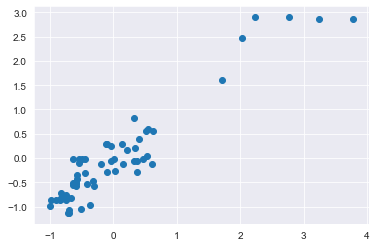

In [170]:
plt.scatter(y_test,y_predict)

In [171]:
from sklearn.metrics import r2_score

In [172]:
r2_score(y_test,y_predict)  #train 0.899

0.8863719344376793

# - The R score of the training set is 0.899 and test set is 0.88 which is very low difference and we can say that our model is good enough.
  - horsepower	
	cylindernumber_six	
	Cars_category_Top_notch_cars	
	enginetype_dohcv	
	cylindernumber_twelve
	aspiration_turbo	
	enginetype_l
 ## These are the  good predictors
 
 
 - Equation of Line to predict the Car prices values
 - 𝑦=𝑐+𝑚1𝑋1+𝑚2𝑋2+𝑚3𝑋3+..........+𝑚𝑛𝑋𝑛
  - *CarPrice = -0.1657+0.6770*Horse Power+1.6991*Cars_category_Top_notch_cars-2.341*enginetype_dohcv+0.563*enginetype_l-     0.1892*aspiration_turbo-0.356*cylindernumber_six-1.311*cylindernumber_twelve*

# Model II

In [173]:
y_predict=lm6.predict(X_train_rfe6c)

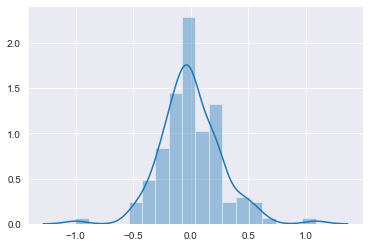

In [174]:
sns.distplot(y-y_predict)

In [181]:
X_test_new1=X_test1[X_train_rfe6c.columns]

In [182]:
Y_precicts1=lm6.predict(X_test_new1)

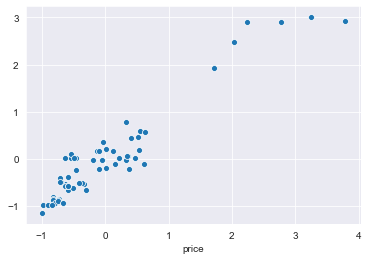

In [183]:
sns.scatterplot(y_test,Y_precicts1)

In [184]:
r2_score(y_test,Y_precicts1)

0.9015767749329568